# The Perceptron Learning Algorithm
 
## Learning And Machine Learning
   Learning is the ability to improve one's behavior with experience. In focusing on the experience aspect of learning, machine learning can be be defined as building computers, systems that automatically improve with experience.
   A typical algorithm solves a problem by giving a computer data and a program to give a suitable output. Machine learning involves giving the data  and examples of outcomes to the computer to output a model for getting suitable
outputs.


<img align="center" width="500" height="300" src="perceptron1.png">


## Synopsis of The Perceptron  
   The Perceptron learning algorithm is an algorithm that is used for supervised learning of binary clusters.The supervised learning involves giving conditions(inputs) with documented outputs. An allusion of learning and the binary clusters means that the choice of output has only two outcomes. The Perceptron was invented in 1957 by Frank Rosenblatt Ph.D. The idea is that the Perceptron works just like the neuron of a nervous system. Each neuron receives thousands of signals from other neurons, connected via synapses. Once the sum of the signals being received surpasses a certain threshold, a response is sent through the axon.
![Neuron Perceptron picture](neuron_perceptron.png)

## Composition of the Perceptron Learning Algorithm
The implementation of the perceptron learning algorithm involves using a collection of features to answer a question that has two choices; binary cluster. And the algorithm learns to make these choices from being exposed to previous data collected with resultant outcomes with one of the two choices. 
So what we have actualy is:
$\mathcal{X} \subseteq \mathbb{R}^d$ and $d \in \mathbb{N}$ be the input space, and let $\mathcal{Y} = \{-1, 1\}$ 
 $x$: Input customer information that is used to make credit decision.
* $f:\mathcal{X} \rightarrow \mathcal{Y}$: *Unknown target* function that is the ideal formula for credit approval. 
* $\mathcal{X}$: *Input space* consisting of all possible input $x$.
* $\mathcal{Y}$: *Output space* consisting of no or yes credit approval.
* $\mathcal{D}$: *Data set* of tuples in  input-output examples of the form $(x_i, y_i)$, where $f(x_i) = y_i$ and $i \in \mathbb{N}$ .
* $\mathcal{A}$: Learning algorithm which uses $D$ to pick a formula (hypothesis) $g:\mathcal{X}\rightarrow \mathcal{Y}$ so that $g\approx f$, where $g\in \mathcal{H}$. Here $\mathcal{H}$ is the *hypothesis space*. 

For $h \in \mathcal{H}$, $h(x)$ gives different weights to the different coordinates of $x$. This reflects the relative importance of each coordinate to the credit decision. The combinded weighted coordinates form a credit score which is compared to some threshold, say $theta$. 

* Approve if
$$
\sum_{i=1}^{d}w_ix_i > \theta
$$

* Deny if
$$
\sum_{i=1}^{d}w_ix_i < \theta
$$

We next introduce a *bias* $- b = \theta$, and so, we build the following form for hypothesis functions in $\mathcal{H}$.

$$
h(x) = \text{sign}\Big((\sum_{i=1}^{d}w_ix_i) + b\Big), 
$$

where $h(x) = 1$ means approve and $h(x) = -1 $ means deny. 

We next simplify notation by treating the bias $b$ as a weight, and modify $x$ so that 

$$
w = [b, w_1, \dots, w_d]^{T}
$$

$$
x = [1.0, x_1, \dots, x_d]^{T}
$$

Thus, $\mathcal{X} = {1.0}\times\mathbb{R}^d$, and $h(x) = \text{sign}(w^{T}x)$. 

### Perceptron Learning Algorithm (PLA)
This is an iterative method. Suppose an example from $(x_1,y_1), \dots, (x_N, y_N)$ is currently misclassifed at time $t$, and denote this misclassifed example by $(x(t), y(t))$. Note that since $(x(t), y(t))$ is currently misclassifed, 

$$
y(t) \neq \text{sign}(w^{T}(t)x(t)). 
$$

**Update Rule:**

$$
w(t+1) = w(t) + y(t)x(t).
$$

**Theorem.** The perceptron model will always classify the training examples correctly when the data is linearly seperable. 


In [1]:
using CSV, Plots, Random

In [2]:
iris = CSV.read("iris_data.csv")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,String⍰
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


Range all rows into a Data Frame of 5 columns

In [3]:
iris = iris[:,1:5];                  

In [4]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,String⍰
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In this model we are only allowed to use two of the measurements to make our model: SepalLength	SepalWidth	PetalLength	PetalWidth. The possible combinations are:
1. col(1) and col(2)
2. col(1) and col(3)
3. col(1) and col(4)
4. col(2) and col(3)
5. col(2) and col(4)
6. col(3) and col(4)


In [5]:
SepalLength_SepalWidth       = [x for x in zip(iris[1], iris[2], iris[5])]
SepalLength_PetalLength      = [x for x in zip(iris[1], iris[3], iris[5])]
SepalLength_PetalWidth       = [x for x in zip(iris[1], iris[4], iris[5])]
SepalWidth_PetalLength       = [x for x in zip(iris[2], iris[3], iris[5])]
SepalWidth_PetalWidth        = [x for x in zip(iris[2], iris[4], iris[5])]
PetalLength_PetalWidth       = [x for x in zip(iris[3], iris[4], iris[5])];

Plotting the combination of IRIS Data Set. Notice the Second Plot Lenght and Width interchange.

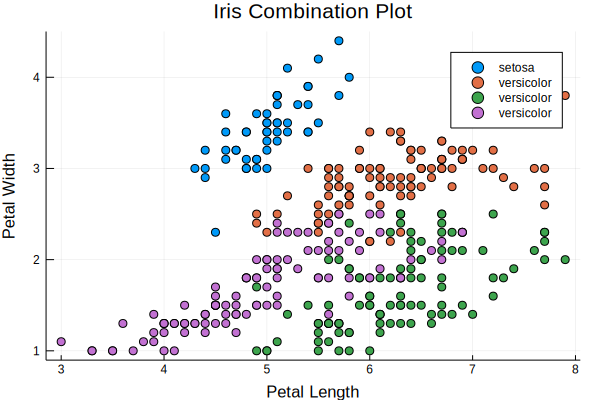

In [6]:
scatter([x[1:2] for x in SepalLength_SepalWidth if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in SepalLength_SepalWidth if x[3] != "setosa"], label = "versicolor")
scatter!([x[1:2] for x in SepalLength_PetalWidth if x[3] != "setosa"], label = "versicolor")
scatter!([x[1:2] for x in PetalLength_PetalWidth if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris Combination Plot", xlabel = "Petal Length", ylabel = "Petal Width")

Here we see that the two combinations are not separable.

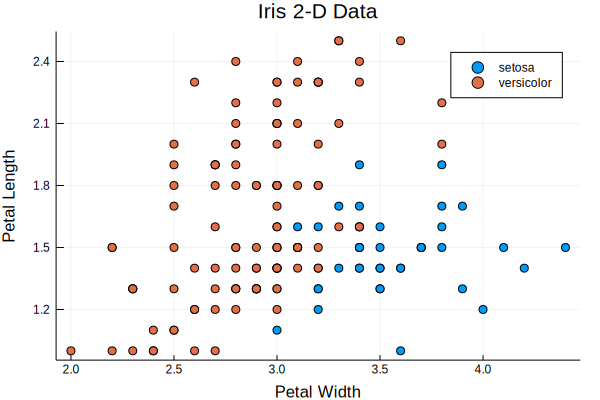

In [7]:
scatter([x[1:2] for x in SepalWidth_PetalLength if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in SepalWidth_PetalWidth if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris 2-D Data", xlabel = "Petal Width", ylabel = "Petal Length")

Hypothesis, Learning Algorith and Predictor Functions.
(ref: https://serhanaya.github.io/neural-networks-julia-implementation/)

In [8]:
wt = rand(3)                       
function h(wt, x)
    x_new = [1.0, x[1], x[2]]
    return wt'x_new > 0 ? 1 : -1
end

function PLA(wt, x, y)
    if h(wt, x) != y
        wt += y*[1.0, x[1], x[2]]
    end
    return w
end

function predictor(n, wt, test)
    return h(wt, test[n]) == 1 ? "setosa" : "versicolor"
end

predictor (generic function with 1 method)

Takes in a data set and number of iterations. It will split the data into training and testing, train the data and make predictions. The output will be the percentage of correct predictions of your testing set.

In [9]:
function final_predict(data, iter)
    wt = rand(3)
    
    shuffled = data = data[shuffle(1:end), :]
    train = shuffled[1:80,:]
    test = shuffled[81:100,:]
    X, Y = [[x[1], x[2]] for x in train], [x[3] == "setosa" ? 1 : -1 for x in train]   
    for i = 1:100
        j = rand(1:80)
        wt = PLA(wt, X[j], Y[j])
    end
    
    accuracy_count = []
    for i = 1:iter
        n = rand(1:20)
        if predictor(n, wt, test) == test[n][3]
            push!(accuracy_count, 1)
        end
    end
    accuracy = sum(accuracy_count) / iter * 100
    return accuracy, wt
end

final_predict (generic function with 1 method)

PREDICTION. Run each possible combination, evalute the accuracy, remember there are six of them:

Combination 1

In [10]:
predict , wt = final_predict(SepalLength_SepalWidth, 1000)
if predict > 90.0    
    print("Comparing Sepal Length vs Sepal Width, the prediction is ", predict, "%")
    else print("Comparing Sepal Length vs Sepal Width, the prediction is NOT good enough")
end

UndefVarError: UndefVarError: w not defined

Combination 2

In [11]:
predict , wt = predict(SepalLength_PetalLength, 1000)
if predict > 90.0    
    print("Comparing Sepal Length vs Petal Length, the prediction is ", predict, "%")
    else print("Comparing Sepal Length vs Petal Length, the prediction is NOT good enough")
end

UndefVarError: UndefVarError: predict not defined

Combination 3

In [12]:
predict , wt = predict(SepalLength_PetalWidth, 1000)
if predict > 90.0    
    print("Comparing Sepal Length vs Petal Width, the prediction is ", predict, "%")
    else print("Comparing Sepal Length vs Petal Width, the prediction is NOT good enough")
end

UndefVarError: UndefVarError: predict not defined

Combination 4

In [13]:
predict , wt = predict(SepalWidth_PetalLength, 1000)
if predict > 90.0    
    print("Comparing Sepal Width vs Petal Length, the prediction is ", predict, "%")
    else print("Comparing Sepal Width vs Petal Length, the prediction is NOT good enough")
end

UndefVarError: UndefVarError: predict not defined

Combination 5

In [14]:
predict , wt = predict(SepalWidth_PetalWidth, 1000)
if predict > 90.0    
    print("Comparing Sepal Width vs Petal Width, the prediction is ", predict, "%")
    else print("Comparing Sepal Width vs Petal Width, the prediction is NOT good enough")
end

UndefVarError: UndefVarError: predict not defined

Combination 6

In [15]:
predict , wt = predict(PetalLength_PetalWidth, 1000)
if predict > 90.0    
    print("Comparing Petal Length vs Petal Width, the prediction is ", predict, "%")
    else print("Comparing Petal Length vs Petal Width, the prediction is NOT good enough")
end

UndefVarError: UndefVarError: predict not defined

The hypothesis conclusion is that PetalLenght vs PetalWidth gives the best linearly separated data as shown in the plot below:

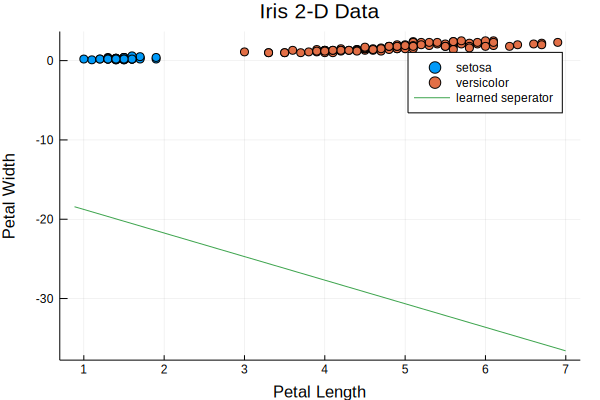

In [16]:
scatter([x[1:2] for x in PetalLength_PetalWidth if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in PetalLength_PetalWidth if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris 2-D Data", xlabel = "Petal Length", ylabel = "Petal Width")
plot!(x -> (-wt[1]-wt[2]*x)/wt[3], label= "learned seperator")